### Lab 1.2: Binary Linear Classifier

In this lab you will try making a binary linear classifier using the [Palmer Penguins dataset](https://allisonhorst.github.io/palmerpenguins/).

You will need to install the packages ``sklearn``, ``palmerpenguins``, and ``mlxtend``.  In the following code block, the ``!`` indicates a shell command.

In [1]:
!pip install scikit-learn palmerpenguins mlxtend

In [2]:
import sklearn
from palmerpenguins import load_penguins
from mlxtend.plotting import plot_decision_regions

The dataset is loaded as a [Pandas dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).  

In [3]:
df = load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


For simplicity we will drop any rows with missing values (encoded as NaNs).

In [4]:
df.dropna(inplace=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Let's select just the Adelie and Chinstrap penguins.

In [5]:
df = df[(df['species']=='Adelie')|(df['species']=='Chinstrap')]

Now we will grab the flipper length and bill length to be the features (stored in ``X``) and the species as the labels (stored in ``y``).

In [6]:
X = df[['flipper_length_mm','bill_length_mm']].values
y = df['species'].map({'Adelie':0,'Chinstrap':1}).values

## Exercises

1. Fit a binary linear classifier using scikit-learn (see ``sklearn.linear_model.LogisticRegression``).

Plot the resulting classifier using ``plot_decision_regions(X, y, clf=model)``.


Text(0.5, 1.0, 'Flipper and Bill Length Correlation to Penguin Species')

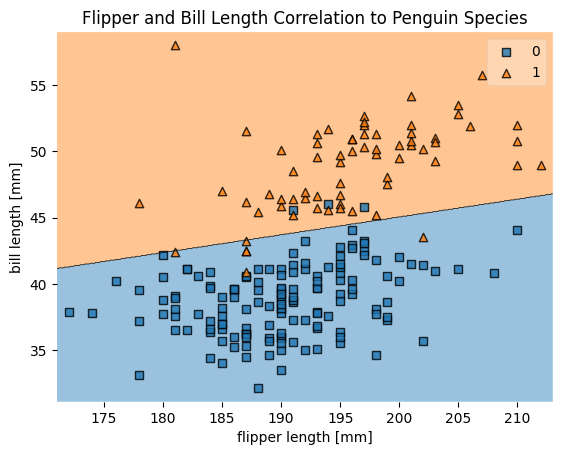

In [7]:
import matplotlib.pyplot as plt

model = sklearn.linear_model.LogisticRegression()
model.fit(X, y)

plot_decision_regions(X, y, clf=model)
plt.xlabel('flipper length [mm]')
plt.ylabel('bill length [mm]')
plt.title('Flipper and Bill Length Correlation to Penguin Species')

2. Print out the coefficients of the line (``model.coef_``).  Interpret these values (in terms of the direction of the line and also what they tell us about how the classifier operates).

In [8]:
model.coef_

array([[-0.15845623,  1.17936568]])

These values show us the linear model shifts heavily in the positive direction for bill length variation, but only shifts slightly in the negative direction for flipper length variation. They also show us the classifier correlates flipper length slightly negatively with species, and correlates bill length very positively with species. 

3. Calculate and print out the accuracy of the classifier using the `.score` function.  Interpret this value.

In [9]:
model.score(X, y)

0.9579439252336449

This score tells us the model has a 95.8% accuracy on the training set

4. Try different combinations of features and print out the accuracy for each one.  Interpret your results.

In [10]:
X = df[['bill_depth_mm', 'bill_length_mm']].values
model.fit(X, y)
print(model.score(X, y))

X = df[['flipper_length_mm','body_mass_g']].values
model.fit(X, y)
print(model.score(X, y))

X = df[['flipper_length_mm','body_mass_g', 'bill_depth_mm', 'bill_length_mm']].values
model = sklearn.linear_model.LogisticRegression(max_iter=150)
model.fit(X, y)
print(model.score(X, y))


0.9719626168224299
0.7383177570093458
0.9906542056074766


Flipper length and body mass combined do not appear to correlate with species. However, using both bill related features instead of bill length with flipper length increases accuracy, and using all features together increases accuracy the most, at the risk of overfitting the data. Bill shape seems to have the greatest impact on differentiating penguin species.